In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import random
import time
import matplotlib.pyplot as plt

# Recursive top-down **approach**

In [ ]:
def recursive(p, num):
    maximum_revenue = [0] * (num + 1)
    cuts = [0] * (num + 1)

    def cut_rod(num):
        if num == 0:
            return 0
        if maximum_revenue[num] > 0:
            return maximum_revenue[num]
        q = float('-inf')
        for i in range(1, min(num + 1, len(p))):
            if p[i - 1] + cut_rod(num - i) > q:
                q = p[i - 1] + cut_rod(num - i)
                cuts[num] = i
        maximum_revenue[num] = q
        return q

    maximum_revenue_value = cut_rod(num)

    # Reconstruct optimal cuts
    cut_lengths = []
    while num > 0:
        cut_lengths.append(cuts[num])
        num -= cuts[num]

    return maximum_revenue_value, cut_lengths

# Dynamic Programming Extended-Bottom-Up **approach**

In [ ]:
def dynamic(p, num):
    r = [0] * (num + 1)
    s = [0] * (num + 1)
    for j in range(1, num + 1):
        q = float('-inf')
        for i in range(1, j + 1):
            if p[i - 1] + r[j - i] > q:
                q = p[i - 1] + r[j - i]
                s[j] = i
        r[j] = q
    cuts = []
    while num > 0:
        cuts.append(s[num])
        num -= s[num]
    return r[-1], cuts

# Memoized **Approach**

In [ ]:
def memoized(p, num):
    memo = [[-1, []] for _ in range(num + 1)]

    def memoized_cut_rod(num):
        if memo[num][0] >= 0:
            return memo[num]
        if num == 0:
            memo[num] = [0, []]
        else:
            q = float('-inf')
            cut_configuration = []
            for i in range(1, num + 1):
                sub_result, sub_cut = memoized_cut_rod(num - i)
                if p[i - 1] + sub_result > q:
                    q = p[i - 1] + sub_result
                    cut_configuration = [i] + sub_cut
            memo[num] = [q, cut_configuration]
        return memo[num]

    maximum_revenue, cuts = memoized_cut_rod(num)
    return maximum_revenue, cuts

calling the algorithms


In [ ]:
def algorithms(prices, num):

    print("Recursive top-down approach:")
    start_time = time.time()
    maximum_revenue, cuts = recursive(prices, num)
    print(f"Rod length: {num}")
    print("\tMaximum revenue:", maximum_revenue)
    print("\tOptimal cuts:", cuts)
    recursive_timetaken = time.time() - start_time
    print("\tExecution time:", recursive_timetaken)

    print("\nMemoized Approach with memoization:")
    start_time = time.time()
    maximum_revenue, cuts = memoized(prices, num)
    print(f"Rod length: {num}")
    print("\tMaximum revenue:", maximum_revenue)
    print("\tOptimal cuts:", cuts)
    memoized_timetaken = time.time() - start_time
    print("\tExecution time:", memoized_timetaken)

    print("\nDynamic Programming Extended-Bottom-Up approach:")
    start_time = time.time()
    maximum_revenue, cuts = dynamic(prices, num)
    print(f"Rod length: {num}")
    print("\tMaximum revenue:", maximum_revenue)
    print("\tOptimal cuts:", cuts)
    dynamic_timetaken = time.time() - start_time
    print("\tExecution time:", dynamic_timetaken)
    print("\n")
    return recursive_timetaken, dynamic_timetaken, memoized_timetaken

generating the price5.txt,price10.txt,price20.txt,price30.txt files


In [ ]:
# generating the prices
def pricearray(n):
    random.seed(21)
    prices = []
    for _ in range(n):
        prices.append(random.randint(1, 30))
    return prices

# writing the prices to the file
def pricefiles(i,prices):
    file=open(f'/content/drive/MyDrive/Colab Notebooks/price{i}.txt','w')
    file.write(f"Rod Length: {i}\n\n")
    for p in prices:
      file.write(f"{p}\n")


**Main()**

In [ ]:
recursive_times = []
dynamic_times = []
memoized_times = []

rod_lengths = [5, 10, 20, 30]
for n in rod_lengths:
    prices = pricearray(n)
    pricefiles(n,prices)
    recursive_time ,dynamic_time, memoized_time = algorithms(prices, n)
    recursive_times.append(recursive_time)
    dynamic_times.append(dynamic_time)
    memoized_times.append(memoized_time)


Recursive top-down approach:
Rod length: 5
	Maximum revenue: 37
	Optimal cuts: [2, 3]
	Execution time: 0.0015826225280761719

Memoized Approach with memoization:
Rod length: 5
	Maximum revenue: 37
	Optimal cuts: [2, 3]
	Execution time: 0.00014328956604003906

Dynamic Programming Extended-Bottom-Up approach:
Rod length: 5
	Maximum revenue: 37
	Optimal cuts: [2, 3]
	Execution time: 0.0001327991485595703


Recursive top-down approach:
Rod length: 10
	Maximum revenue: 75
	Optimal cuts: [1, 3, 3, 3]
	Execution time: 0.00025844573974609375

Memoized Approach with memoization:
Rod length: 10
	Maximum revenue: 75
	Optimal cuts: [1, 3, 3, 3]
	Execution time: 0.00017213821411132812

Dynamic Programming Extended-Bottom-Up approach:
Rod length: 10
	Maximum revenue: 75
	Optimal cuts: [1, 3, 3, 3]
	Execution time: 0.0001289844512939453


Recursive top-down approach:
Rod length: 20
	Maximum revenue: 152
	Optimal cuts: [2, 3, 3, 3, 3, 3, 3]
	Execution time: 0.0004317760467529297

Memoized Approach wit

# Line graph

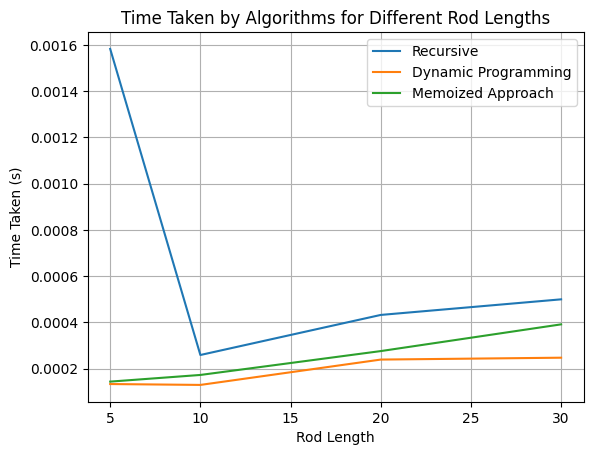

In [ ]:

plt.plot(rod_lengths, recursive_times, label='Recursive')
plt.plot(rod_lengths, dynamic_times, label='Dynamic Programming')
plt.plot(rod_lengths, memoized_times, label='Memoized Approach')

plt.xlabel('Rod Length')
plt.ylabel('Time Taken (s)')
plt.title('Time Taken by Algorithms for Different Rod Lengths')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
## Additional information (verification)
## if we consider our  last two digits of uta Id's the radomly generated price for cutting the 1unit length rod is high. so we will have the
## optimal cut as [1,1,1,..rod-length] for producing maxmium revenue.
## For proper verification we have took seed value as '21' in above code rather than our uta id's '12 or 10'
def pricearray(n):
    random.seed(10) ##took seed value as  last two digits of UTA ID
    prices = []
    for _ in range(n):
        prices.append(random.randint(1, 30))
    return prices
rod_lengths = [5, 10, 20, 30]
for n in rod_lengths:
    prices = pricearray(n)
    print(prices)
    algorithms(prices, n)


[19, 2, 14, 16, 19]
Recursive top-down approach:
Rod length: 5
	Maximum revenue: 95
	Optimal cuts: [1, 1, 1, 1, 1]
	Execution time: 0.00395655632019043

Memoized Approach with memoization:
Rod length: 5
	Maximum revenue: 95
	Optimal cuts: [1, 1, 1, 1, 1]
	Execution time: 0.00012159347534179688

Dynamic Programming Extended-Bottom-Up approach:
Rod length: 5
	Maximum revenue: 95
	Optimal cuts: [1, 1, 1, 1, 1]
	Execution time: 9.965896606445312e-05


[19, 2, 14, 16, 19, 1, 7, 15, 27, 16]
Recursive top-down approach:
Rod length: 10
	Maximum revenue: 190
	Optimal cuts: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	Execution time: 0.0001304149627685547

Memoized Approach with memoization:
Rod length: 10
	Maximum revenue: 190
	Optimal cuts: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	Execution time: 0.00015616416931152344

Dynamic Programming Extended-Bottom-Up approach:
Rod length: 10
	Maximum revenue: 190
	Optimal cuts: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
	Execution time: 9.036064147949219e-05


[19, 2, 14, 16, 19, 1, 7,